In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential

import glob, os, random

In [11]:
"""==========
   dataset 가져오기
   =========="""

base_path = 'dataset/training'

img_list = glob.glob(os.path.join(base_path, '*/*')) + glob.glob(os.path.join(base_path, '*/*/*'))

print(len(img_list))

4964


In [12]:
"""==========
   train, test dataset 만들기
   =========="""

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)
"""
* ImageDataGenerator 인수 정리
rotation_range: 이미지 회전 범위 (degrees)
width_shift, height_shift: 그림을 수평 또는 수직으로 랜덤하게 평행 이동시키는 범위 (원본 가로, 세로 길이에 대한 비율 값)
rescale: 원본 영상은 0-255의 RGB 계수로 구성되는데, 이 같은 입력값은 모델을 효과적으로 학습시키기에 너무 높습니다 (통상적인 learning rate를 사용할 경우). 그래서 이를 1/255로 스케일링하여 0-1 범위로 변환시켜줍니다. 이는 다른 전처리 과정에 앞서 가장 먼저 적용됩니다.
shear_range: 임의 전단 변환 (shearing transformation) 범위
zoom_range: 임의 확대/축소 범위
horizontal_flip: True로 설정할 경우, 50% 확률로 이미지를 수평으로 뒤집습니다. 원본 이미지에 수평 비대칭성이 없을 때 효과적입니다. 즉, 뒤집어도 자연스러울 때 사용하면 좋습니다.
fill_mode 이미지를 회전, 이동하거나 축소할 때 생기는 공간을 채우는 방식
"""


test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

# flow_from_directory() : 폴더 형테의 데이터 구조 가지고 옴
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 4453 images belonging to 6 classes.
Found 491 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [13]:
"""==========
   모델 구성하기
   =========="""

# CNN/ 케라스 컨볼루션 신경망 레이어(Conv2D)
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])

In [14]:
"""==========
   모델 학습과정 설정하기
   =========="""

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 256)      

In [15]:
"""==========
   모델 학습하기_1
   =========="""

model.fit_generator(train_generator, steps_per_epoch=15, epochs=5, validation_data=validation_generator,validation_steps=5)

Epoch 1/5
15/15 [==============================] - 133s 9s/step - loss: 1.7392 - acc: 0.2375 - val_loss: 1.6416 - val_acc: 0.2375
Epoch 2/5
15/15 [==============================] - 122s 8s/step - loss: 1.6179 - acc: 0.3625 - val_loss: 1.7065 - val_acc: 0.1500
Epoch 3/5
15/15 [==============================] - 139s 9s/step - loss: 1.4990 - acc: 0.3417 - val_loss: 1.8958 - val_acc: 0.3375
Epoch 4/5
15/15 [==============================] - 128s 9s/step - loss: 1.5855 - acc: 0.3000 - val_loss: 1.5346 - val_acc: 0.2625
Epoch 5/5
15/15 [==============================] - 110s 7s/step - loss: 1.5458 - acc: 0.3375 - val_loss: 1.5733 - val_acc: 0.2625


In [16]:
"""==========
   모델 학습하기_2
   =========="""
hist = model.fit_generator(train_generator, epochs=80, validation_data=validation_generator)

Epoch 1/80
279/279 [==============================] - 1349s 5s/step - loss: 1.3786 - acc: 0.4184 - val_loss: 0.7408 - val_acc: 0.5071
Epoch 2/80
279/279 [==============================] - 1176s 4s/step - loss: 1.2156 - acc: 0.4864 - val_loss: 1.3445 - val_acc: 0.5092
Epoch 3/80
279/279 [==============================] - 1386s 5s/step - loss: 1.1386 - acc: 0.5239 - val_loss: 0.8309 - val_acc: 0.5234
Epoch 4/80
279/279 [==============================] - 1415s 5s/step - loss: 1.0739 - acc: 0.5549 - val_loss: 0.6498 - val_acc: 0.5112
Epoch 5/80
279/279 [==============================] - 1395s 5s/step - loss: 1.0345 - acc: 0.5956 - val_loss: 1.7436 - val_acc: 0.5764
Epoch 6/80
279/279 [==============================] - 1475s 5s/step - loss: 0.9732 - acc: 0.6196 - val_loss: 1.8975 - val_acc: 0.5336
Epoch 7/80
279/279 [==============================] - 1318s 5s/step - loss: 0.9224 - acc: 0.6420 - val_loss: 1.1283 - val_acc: 0.6130
Epoch 8/80
279/279 [==============================] - 1107s 4s

Epoch 62/80
279/279 [==============================] - 735s 3s/step - loss: 0.2349 - acc: 0.9158 - val_loss: 0.5787 - val_acc: 0.7210
Epoch 63/80
279/279 [==============================] - 602s 2s/step - loss: 0.2491 - acc: 0.9129 - val_loss: 1.4389 - val_acc: 0.7047
Epoch 64/80
279/279 [==============================] - 569s 2s/step - loss: 0.2259 - acc: 0.9205 - val_loss: 0.6627 - val_acc: 0.7210
Epoch 65/80
279/279 [==============================] - 541s 2s/step - loss: 0.2145 - acc: 0.9205 - val_loss: 0.2832 - val_acc: 0.7393
Epoch 66/80
279/279 [==============================] - 543s 2s/step - loss: 0.2263 - acc: 0.9259 - val_loss: 1.2433 - val_acc: 0.7413
Epoch 67/80
279/279 [==============================] - 565s 2s/step - loss: 0.2186 - acc: 0.9239 - val_loss: 1.7715 - val_acc: 0.6904
Epoch 68/80
279/279 [==============================] - 608s 2s/step - loss: 0.2327 - acc: 0.9160 - val_loss: 0.9362 - val_acc: 0.7026
Epoch 69/80
279/279 [==============================] - 612s 2s

In [17]:
"""==========
   모델 평가하기
   =========="""

print("-- Evaluate --")
scores = model.evaluate_generator(validation_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 75.00%


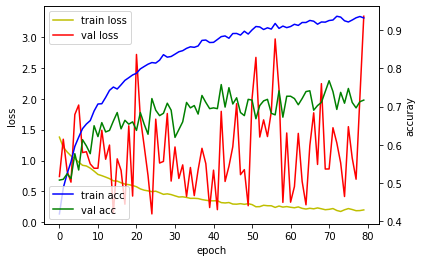

In [18]:
# 모델 학습 그래프 확인
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [19]:
# 모델 저장
model_json = model.to_json()
with open("model/model.json", "w") as json_file : 
    json_file.write(model_json)

# 모델 weight 저장
keras_file="weight/garbage.h5"
model.save(keras_file)